In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

titanic_data = pd.read_csv('Data/Titanic.csv')
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


## Analysing data

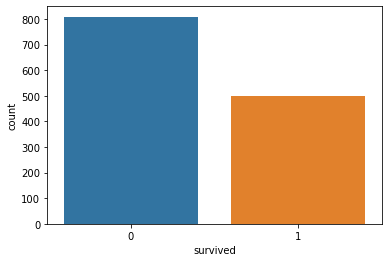

In [2]:
countplot = sns.countplot(x='survived', data=titanic_data)
# 0 - people who didn't survive
# 1 - people who survived

survived
0    809
1    500
dtype: int64


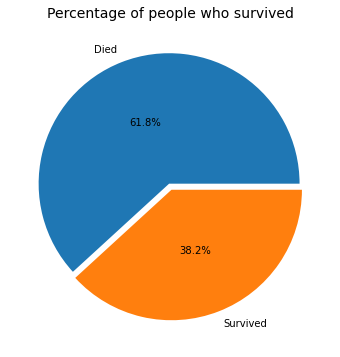

In [3]:

pie, ax = plt.subplots(figsize=[10,6])
data = titanic_data.groupby("survived").size()  # data for Pie chart
print(data)
labels = ['Died', 'Survived']
plt.pie(x=data, autopct="%.1f%%", explode=[0.025]*2, labels=labels, pctdistance=0.5)
plt.title("Percentage of people who survived", fontsize=14);

As we can see according to the dataset majority of people didn't survive (809 died to 500 survived). We have to keep in mind that actually in Titanic was much more passengers however, this dataset doesn't have all of them


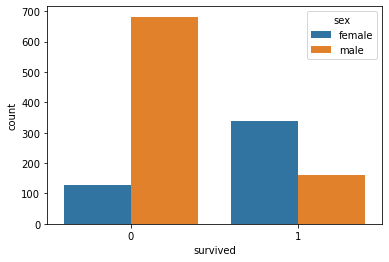

In [4]:
sns.countplot(x='survived', hue='sex', data=titanic_data)

From this plot, we learn that much fewer males survived than females. About 2 times more women survived. Probably because women and children were rescued first. And they as first entered lifeboats.

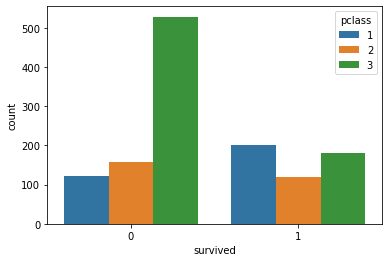

In [5]:
sns.countplot(x='survived', hue='pclass', data=titanic_data)

Another plot compares passenger classes. In the group of people who not survived are many more people from the 3rd class (the green bar). In the group of people who survived we see the majority of people come from 1st class. Let's check now the age of passengers

In [6]:
# titanic_data["age"].plot.hist() # this method doesn't work because some of the age values are not numeric
age = titanic_data["age"]
# Let's count how many values are missing
p = 0
for a in age:
    if a=='?':
        p+=1
print(p)


263


### We can do few things to fix that
1. Delete raws with missing age value
2. Fill missing values with median
3. Use algorithm to predict missing values

263 is quite much so I decided I will fill missing values with median


In [7]:
# Let's count median
age = age[age!='?']  # first filter non numeric values
age_median = age.median()
print("Median: ", age_median)

# change all '?' values in dataframe to median
titanic_data['age'] = titanic_data['age'].replace(['?'], age_median)

# Let's check in a case if there is no any string values in age column
p = 0
for a in titanic_data['age']:
    if isinstance(a, str):
        p+=1
print("string values: ", p)


Median:  28.0
string values:  1046


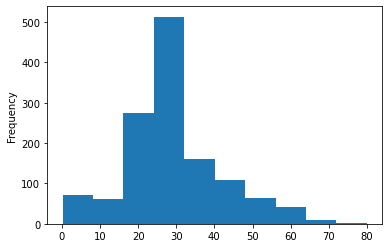

In [8]:

titanic_data["age"] = titanic_data["age"].astype(float)
titanic_data["age"].plot.hist()

We can see most of the passengers were between 25 and 30 years. It's due to the median that filled missing values. However, the median is the middle value of all passengers ages.

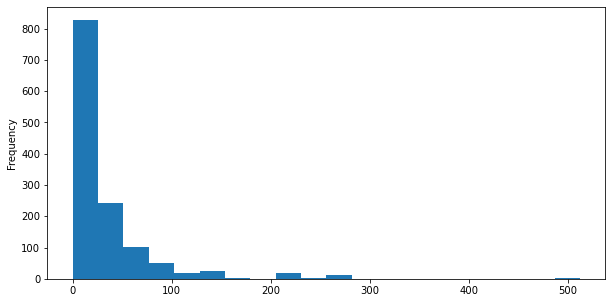

In [9]:
# Fare value also has '?' values 
ticket = titanic_data["fare"]
ticket = ticket[ticket!='?']
titanic_data['fare'] = titanic_data['fare'].replace(['?'], ticket.median())

titanic_data["fare"] = titanic_data["fare"].astype(float) # change values to float (in csv they are often saved as string)
titanic_data["fare"].plot.hist(bins=20, figsize=(10,5))

In [10]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1309 non-null   float64
 9   cabin      1309 non-null   object 
 10  embarked   1309 non-null   object 
 11  boat       1309 non-null   object 
 12  body       1309 non-null   object 
 13  home.dest  1309 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 143.3+ KB


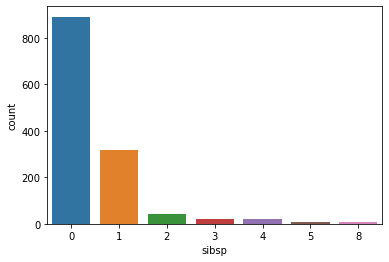

In [11]:
sns.countplot(x="sibsp", data=titanic_data)

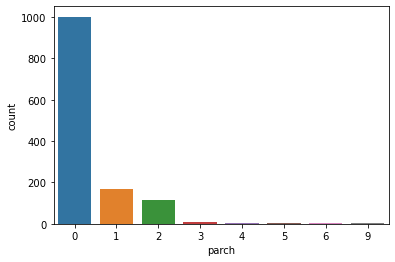

In [12]:
sns.countplot(x="parch", data=titanic_data)

Here we can see if passengers had families on the board or were traveling alone. Later we will check if this value was significant for surviving.

In [26]:
titanic_data.isnull().sum()  
# This dataset doesn't have null values but instead 
# it has '?' values that makes it more dificult to work with

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

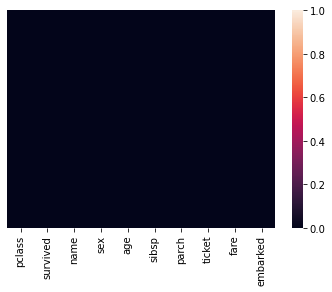

In [27]:
def checkForQuestionMarks(value):
        return value=='?'
    
sns.heatmap(titanic_data.apply(checkForQuestionMarks), yticklabels=False)

### Heatmap and missing values
In here I showed heatmap that indicates '?' values. As you can see there are a lot of missing values in cabin, boat, body and home.dest columns. What we can do is to delete those columns since we don't need them in our analysis

In [15]:
titanic_data.drop(["cabin", "boat", "body", "home.dest"], axis=1, inplace=True)

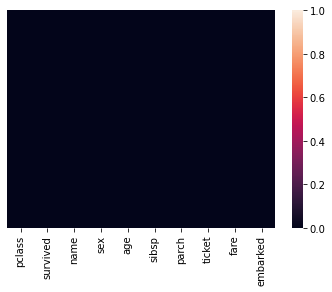

In [16]:
sns.heatmap(titanic_data.apply(checkForQuestionMarks), yticklabels=False) # Let's check it again

Now we are going to focus on categorical data. Columns that have category data like gender or embark must be separate on more columns that each of those columns will have value 0 or 1. We have to do those operations to prepare dataset for logistic regression.

In [17]:
sex = pd.get_dummies(titanic_data["sex"], drop_first=True)
sex.head(5)

,male
0,0
1,1
2,0
3,1
4,0


In [18]:
embark = pd.get_dummies(titanic_data["embarked"])
embark.head(5)

,?,C,Q,S
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


Apperantly we still have some missing values. Heatmap didn't show any '?' values but I'll check how many of them exist

In [19]:
embark['?'].sum()

2

Only two so I think we can delete first column and model still should works 

In [20]:
embark.drop('?', axis=1, inplace=True)
embark.head(1)

,C,Q,S
0,0,0,1


Works fine 

In [21]:
pclass = pd.get_dummies(titanic_data["pclass"])
pclass.head(5)

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [22]:
temp = [sex, embark, pclass, 
        titanic_data["age"],  titanic_data["sibsp"], 
        titanic_data["parch"], titanic_data["fare"], titanic_data["survived"]]

processed_data = pd.concat(temp, axis=1)
processed_data.head(5)

,male,C,Q,S,1,2,3,age,sibsp,parch,fare,survived
0,0,0,0,1,1,0,0,29.0000,0,0,211.3375,1
1,1,0,0,1,1,0,0,0.9167,1,2,151.5500,1
2,0,0,0,1,1,0,0,2.0000,1,2,151.5500,0
3,1,0,0,1,1,0,0,30.0000,1,2,151.5500,0
4,0,0,0,1,1,0,0,25.0000,1,2,151.5500,0


## Training data

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [30]:
X = processed_data.drop("survived", axis=1) # X = all data apart of survived column
y = processed_data["survived"] # y = only column survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [36]:
logmodel = LogisticRegression(max_iter=1000)  # we have to set max_iter to higher value to not get error
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [40]:
prediction = logmodel.predict(X_test)
classification_report(y_test, prediction)

'              precision    recall  f1-score   support\n\n           0       0.81      0.86      0.83       236\n           1       0.77      0.69      0.73       157\n\n    accuracy                           0.79       393\n   macro avg       0.79      0.78      0.78       393\nweighted avg       0.79      0.79      0.79       393\n'

In [42]:
confusion_matrix(y_test, prediction)

array([[204,  32],
       [ 49, 108]], dtype=int64)

In [44]:
accuracy_score(y_test, prediction)

0.7938931297709924

## We have 79% of accuracy

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
logmodel.fit(X_train, y_train)
prediction = logmodel.predict(X_test)
accuracy_score(y_test, prediction)

0.8206106870229007

### We can get above 80% of accuracy if we split data 80 to 20. Training data 80% and testing 20% 

So we just made a model that can predict if a person survives or not a Titanic catastrophe based only on the passenger data like his class, age, sex, etc

In [102]:
mydata = X_train[0:0]
a = {'male':1, 'C':0, 'Q':0, 'S':1, 1:0, 2:0, 3:1, 'age':23,
     'sibsp':0, 'parch':0, 'fare':55.0}

mydata = mydata.append(a, ignore_index=True)

would_i_survive = logmodel.predict(mydata)
print(would_i_survive)

[0]


### Would I survive the titanic crash?
I put my data like sex, age, and of course, I had to put some random data about embark which is *Port of Embarkation*, number of siblings and parents on the board or the fare. Because I'm a student I put myself into 3rd class, as a passenger who is traveling alone. 
Unfortunately, as you can guess 0 means - didn't survive :(

In [108]:
# we do the same thing but with different data
mydata = X_train[0:0]
a = {'male':1, 'C':0, 'Q':0, 'S':1, 1:1, 2:0, 3:0, 'age':23,
     'sibsp':0, 'parch':0, 'fare':151.0}

mydata = mydata.append(a, ignore_index=True)

would_i_survive = logmodel.predict(mydata)
print(would_i_survive)

[1]


I would survive (or at least I would have more chance to survive) if I was traveling in the first class and my fare was at least 140 

### Summary
From this kernel we learned that the most important feature for surviving was the passenger class and sex. Mostly women had more chances for surviving than men. Also, the majority of passengers who survived are from the first class. 

We built a model using logistic regression that can predict if a person survives or not with a probability of 82%. For this model first, we had to clean the data by deleting some columns that weren't important and had many missing values. And some of the missing values we filled with median like in the case with the age of passengers. This dataset instead of null values had '?' which needed a bit more code to clean it

In the end, I checked if I would survive the Titanic crash if I was traveling alone in 3rd class and sadly I wouldn't